In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import os

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

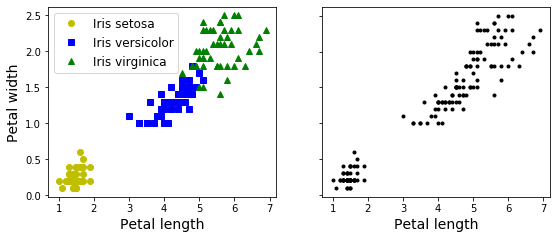

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
# X[:,2] is petal width, X[:,3] is petal length
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa") 
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
sum_correct = np.sum(y_pred==y)
mapping = np.array([2, 0, 1])
mapping
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

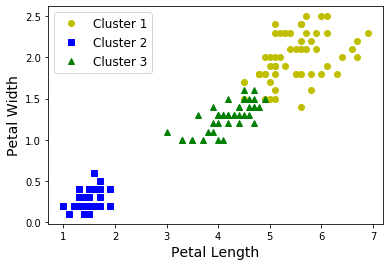

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

## K-Means

In [8]:
from sklearn.datasets import make_blobs

In [9]:
blob_centers = np.array(
    [
        [0.2, 2.3],
        [-1.5, 2.3],
        [-2.8,  1.8],
        [-2.8,  2.8],
        [-2.8,  1.3]
    ]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [10]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [11]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

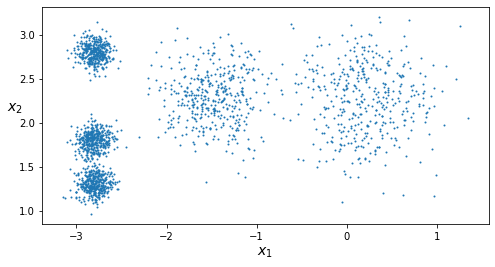

In [12]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## Fit and Predict

Let's train a K-Means cluster on this dataset. It will try to find each blob's center and assign each instance to the cloest blob:

In [13]:
from sklearn.cluster import KMeans

In [14]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [16]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [17]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

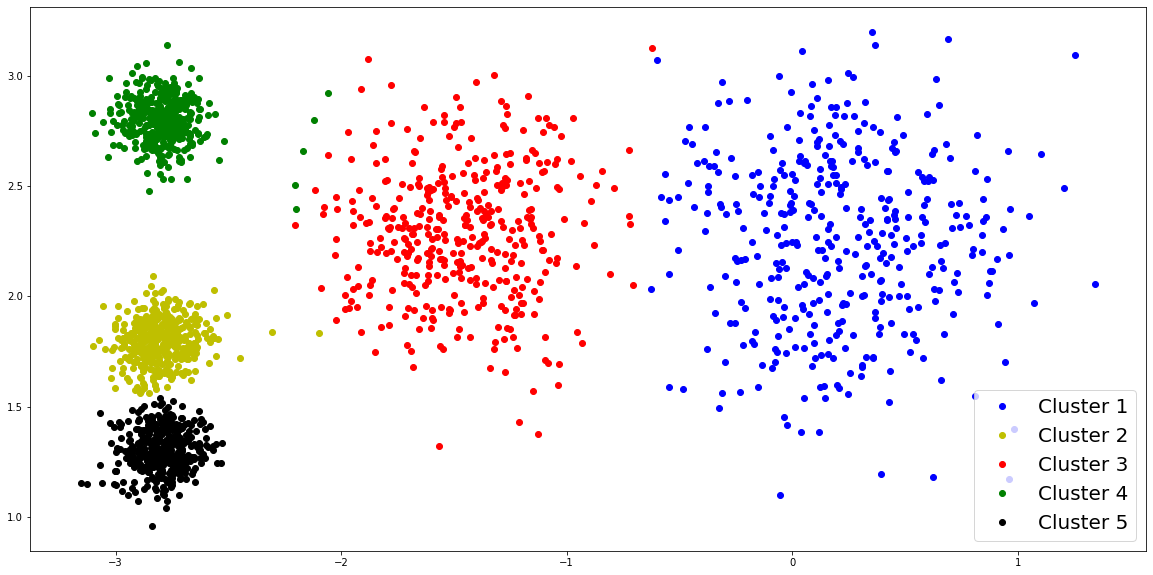

In [18]:
plt.figure(figsize=(20,10))
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "bo", label="Cluster 1")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "yo", label="Cluster 2")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "ro", label="Cluster 3")
plt.plot(X[y_pred==3, 0], X[y_pred==3, 1], "go", label="Cluster 4")
plt.plot(X[y_pred==4, 0], X[y_pred==4, 1], "ko", label="Cluster 5")
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

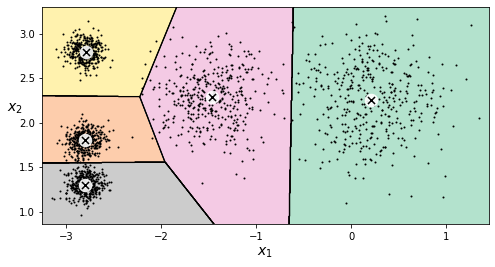

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## Hard Clustering vs Soft Clustering

Rather than arbitrarily chossing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 5 centroids, this is what the transform() method does:

In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

In [22]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1 and algorithm="full". These hyperparameters will be explained below.

In [23]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=3, random_state=1)

In [24]:
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

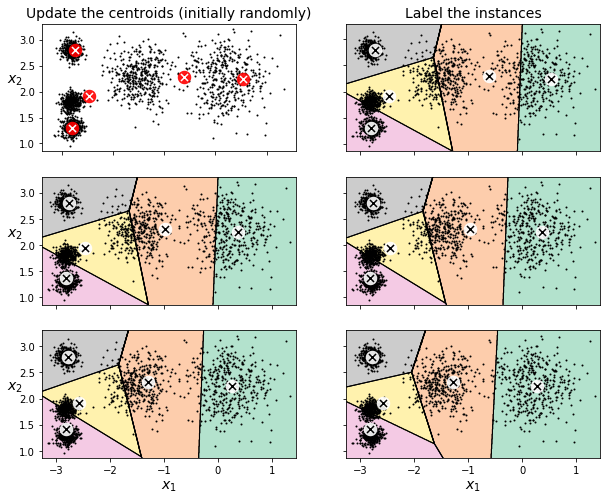

In [33]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

## Use Inertia to measure model performance

In [34]:
kmeans.inertia_

211.5985372581684

In [36]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [37]:
kmeans.score(X)

-211.59853725816856

## Mini-Batch K-Means

In [41]:
from sklearn.cluster import MiniBatchKMeans

In [43]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [45]:
minibatch_kmeans.inertia_

211.93186531476775

### if the dataset is too large for the memory to fit, then we need to use memap class

In [55]:
import urllib
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [57]:
X_train.shape

(52500, 784)

In [60]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [61]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [63]:
%timeit KMeans(n_clusters=5).fit(X)

50.4 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

29.3 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

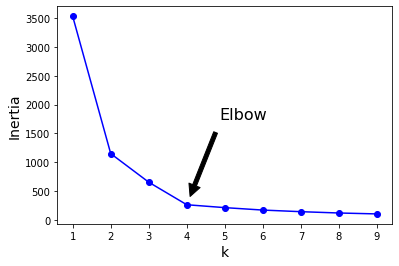

In [73]:
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext=(0.55, 0.55), textcoords='figure fraction', fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [81]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

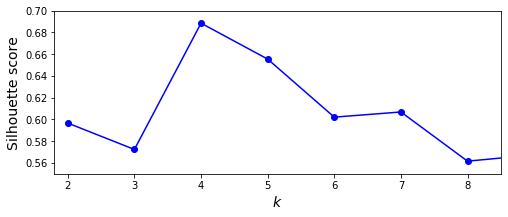

In [83]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

## Using clustering for image segmentation

In [89]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x24feae42e48>)

In [91]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [97]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [112]:
print(np.unique(kmeans.labels_))

[0 1]


In [96]:
segmented_img = kmeans.cluster_Centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [113]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

[[0.01699969 0.09461629 0.00515878]
 [0.01699969 0.09461629 0.00515878]
 [0.01699969 0.09461629 0.00515878]
 ...
 [0.06924731 0.212881   0.01134901]
 [0.06924731 0.212881   0.01134901]
 [0.06924731 0.212881   0.01134901]]
[[0.02093545 0.10603908 0.00559799]
 [0.02093545 0.10603908 0.00559799]
 [0.02093545 0.10603908 0.00559799]
 ...
 [0.09142023 0.24330519 0.01521175]
 [0.09142023 0.24330519 0.01521175]
 [0.02093545 0.10603908 0.00559799]]
[[0.03229482 0.1331324  0.00685377]
 [0.03229482 0.1331324  0.00685377]
 [0.03229482 0.1331324  0.00685377]
 ...
 [0.03229482 0.1331324  0.00685377]
 [0.03229482 0.1331324  0.00685377]
 [0.03229482 0.1331324  0.00685377]]
[[0.0445129  0.15450107 0.00842763]
 [0.0445129  0.15450107 0.00842763]
 [0.0445129  0.15450107 0.00842763]
 ...
 [0.0445129  0.15450107 0.00842763]
 [0.0445129  0.15450107 0.00842763]
 [0.0445129  0.15450107 0.00842763]]
[[0.13395093 0.26566434 0.04003378]
 [0.13395093 0.26566434 0.04003378]
 [0.13395093 0.26566434 0.04003378]
 ...

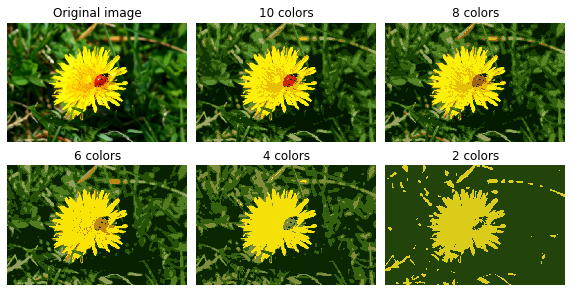

In [105]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Using Clustering for preprocessing

In [114]:
from sklearn.datasets import load_digits

In [115]:
X_digits, y_digits = load_digits(return_X_y=True)

In [116]:
X_digits.shape

(1797, 64)

In [117]:
y_digits.shape

(1797,)